In [52]:
from visual_behavior.data_access import loading
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import visual_behavior_glm.GLM_analysis_tools as gat

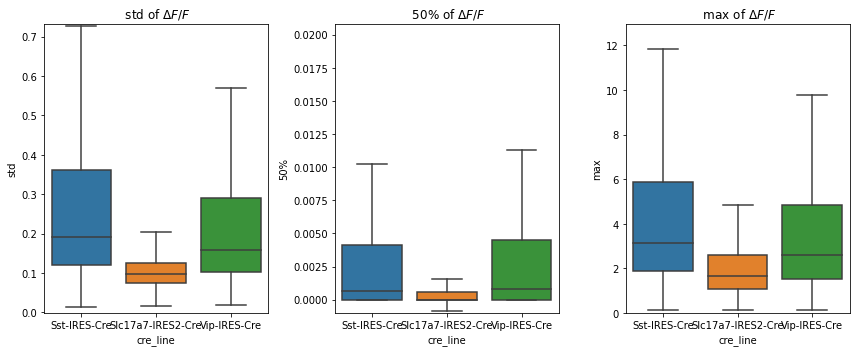

In [51]:
cell_table = loading.get_cell_summary()
fig, ax = plt.subplots(1,3,figsize=(12,5))
plots = [
    'std',
    '50%',
    'max'
]
for ii,plot_type in enumerate(plots):
    bp = sns.boxplot(
        data = cell_table,
        ax = ax[ii],
        x = 'cre_line',
        y = plot_type,
        fliersize=0,
    )
    
    ax[ii].set_ylim(
        -0.001,
        np.percentile(cell_table[plot_type].dropna(), 98)
    )
    
    ax[ii].set_title(r' {} of $\Delta F/F$'.format(plot_type))
    

fig.tight_layout()

In [53]:
results_summary = gat.retrieve_results({'glm_version':'10a_L2_optimize_by_session'})

In [57]:
rs = results_summary.merge(
    cell_table,
    left_on = ['cell_specimen_id','ophys_experiment_id'],
    right_on = ['cell_specimen_id','ophys_experiment_id'],
    suffixes = ['','_duplicated']
)
rs

,_id,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,...,cre_line_duplicated,session_tags_duplicated,failure_tags_duplicated,session_type_exposure_number_duplicated,prior_exposures_to_image_set_duplicated,prior_exposures_to_omissions_duplicated,model_outputs_available_duplicated,location_duplicated,has_events_duplicated,session_number_duplicated
0,5fdbe5e068bb216cf1e6f470,1065597270,0.085424,0.032659,0.032659,0.085424,0.032659,0.032659,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,13.0,NaN,False,Vip_VISp_175,True,2
1,5fdbe5e068bb216cf1e6f471,1065597560,0.229548,0.218705,0.218705,0.229548,0.218705,0.218705,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,13.0,NaN,False,Vip_VISp_175,True,2
2,5fdbe5e068bb216cf1e6f472,1065601528,0.188095,0.163322,0.163322,0.188095,0.163322,0.163322,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,13.0,NaN,False,Vip_VISp_175,True,2
3,5fdbe5e068bb216cf1e6f473,1065596730,0.271700,0.235764,0.235764,0.271700,0.235764,0.235764,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,13.0,NaN,False,Vip_VISp_175,True,2
4,5fdbe5e068bb216cf1e6f474,1065604675,0.262324,0.243980,0.243980,0.262324,0.243980,0.243980,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,13.0,NaN,False,Vip_VISp_175,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39383,5ff6059e7fa67d83b2f179bb,1065596245,0.173232,0.148079,0.148079,0.173232,0.148079,0.148079,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,10.0,NaN,False,Vip_VISp_187,True,1
39384,5ff6059e7fa67d83b2f179bc,1065596730,0.346743,0.330741,0.330741,0.346743,0.330741,0.330741,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,10.0,NaN,False,Vip_VISp_187,True,1
39385,5ff6059e7fa67d83b2f179bd,1065597018,0.121255,0.099642,0.099642,0.121255,0.099642,0.099642,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,10.0,NaN,False,Vip_VISp_187,True,1
39386,5ff6059e7fa67d83b2f179be,1065597270,0.092004,0.055695,0.055695,0.092004,0.055695,0.055695,0.0,-0.0,...,Vip-IRES-Cre,NaN,NaN,0,10.0,NaN,False,Vip_VISp_187,True,1


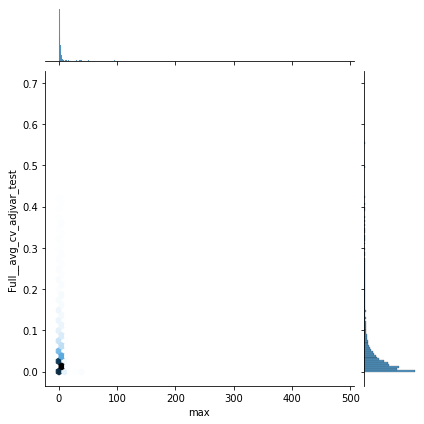

In [66]:
sns.jointplot(
    data = rs.sample(5000),
    x = 'max',
    y = 'Full__avg_cv_adjvar_test',
    kind="hex"
)